In [7]:
import numpy as np
import cv2
import PIL
from PIL import Image
import pytesseract
from matplotlib import pyplot as plt

In [9]:
image = "data/letter.png"
im = Image.open(image)
im.rotate(90).show()

In [17]:
img = cv2.imread(image)
# cv2.imshow('Original Image',img)
# cv2.waitKey(100)

In [14]:
def display(img_path):
    dpi = 80
    im_data = plt.imread(img_path)
    if im_data.ndim == 2:
        h,w = im_data.shape
        d = 1
    else:
        h,w,d = im_data.shape

    figisze = w/float(dpi), h/float(dpi)

    fig = plt.figure(figsize=figisze)
    ax = fig.add_axes([0,0,1,1])

    ax.axis('off')

    ax.imshow(im_data, cmap='gray')
    plt.show()

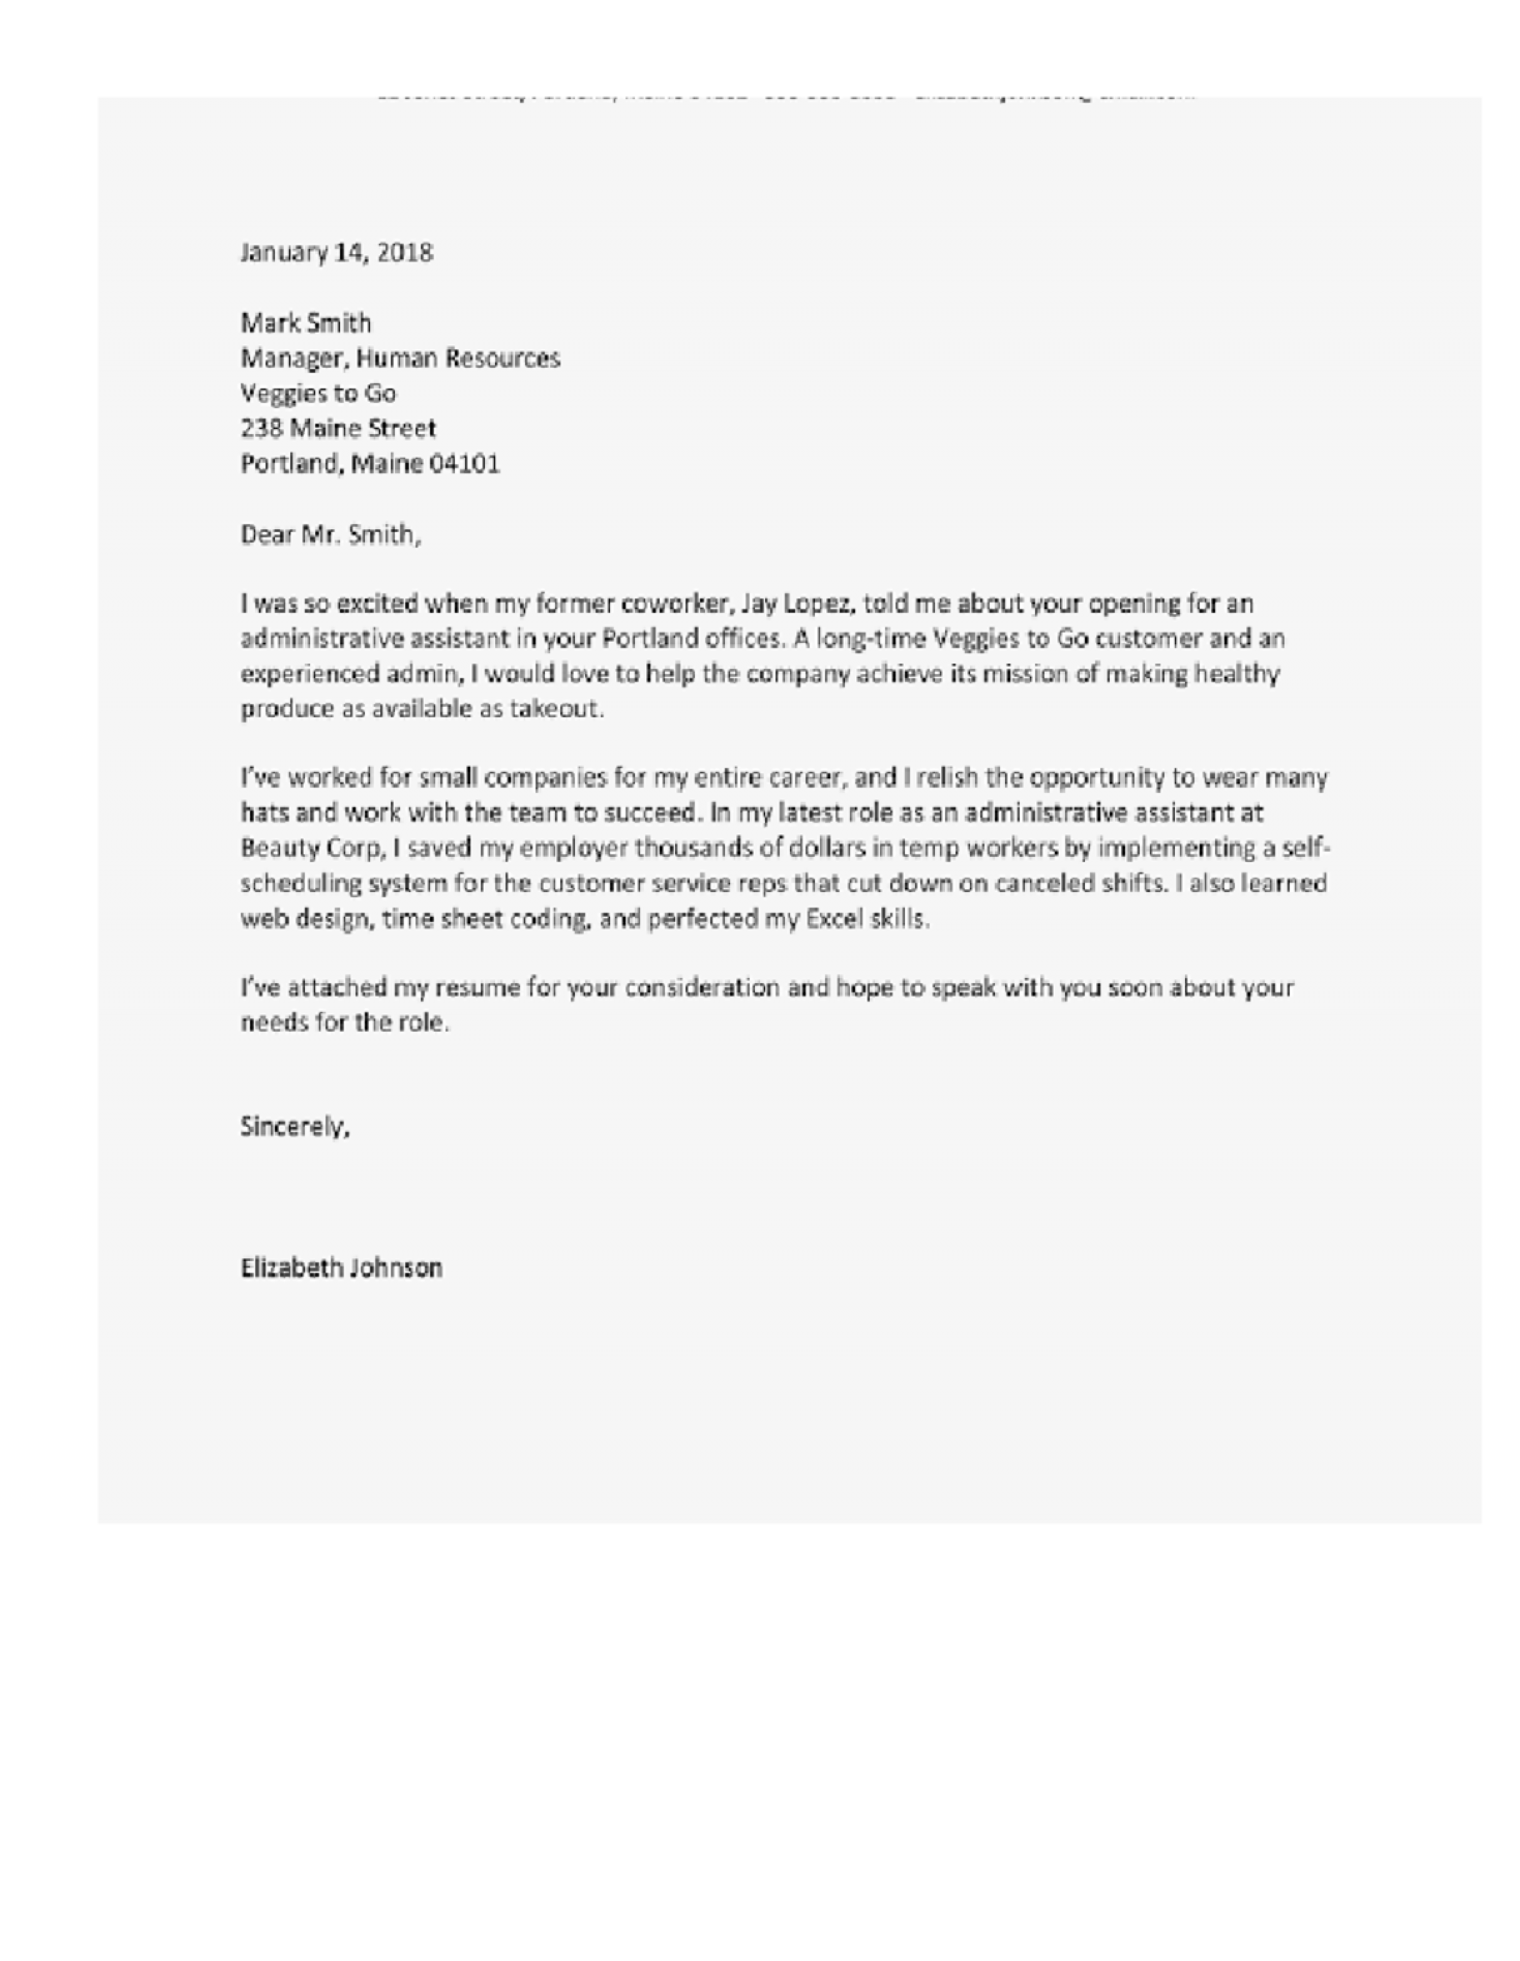

In [15]:
display(image)

## Inverted Image

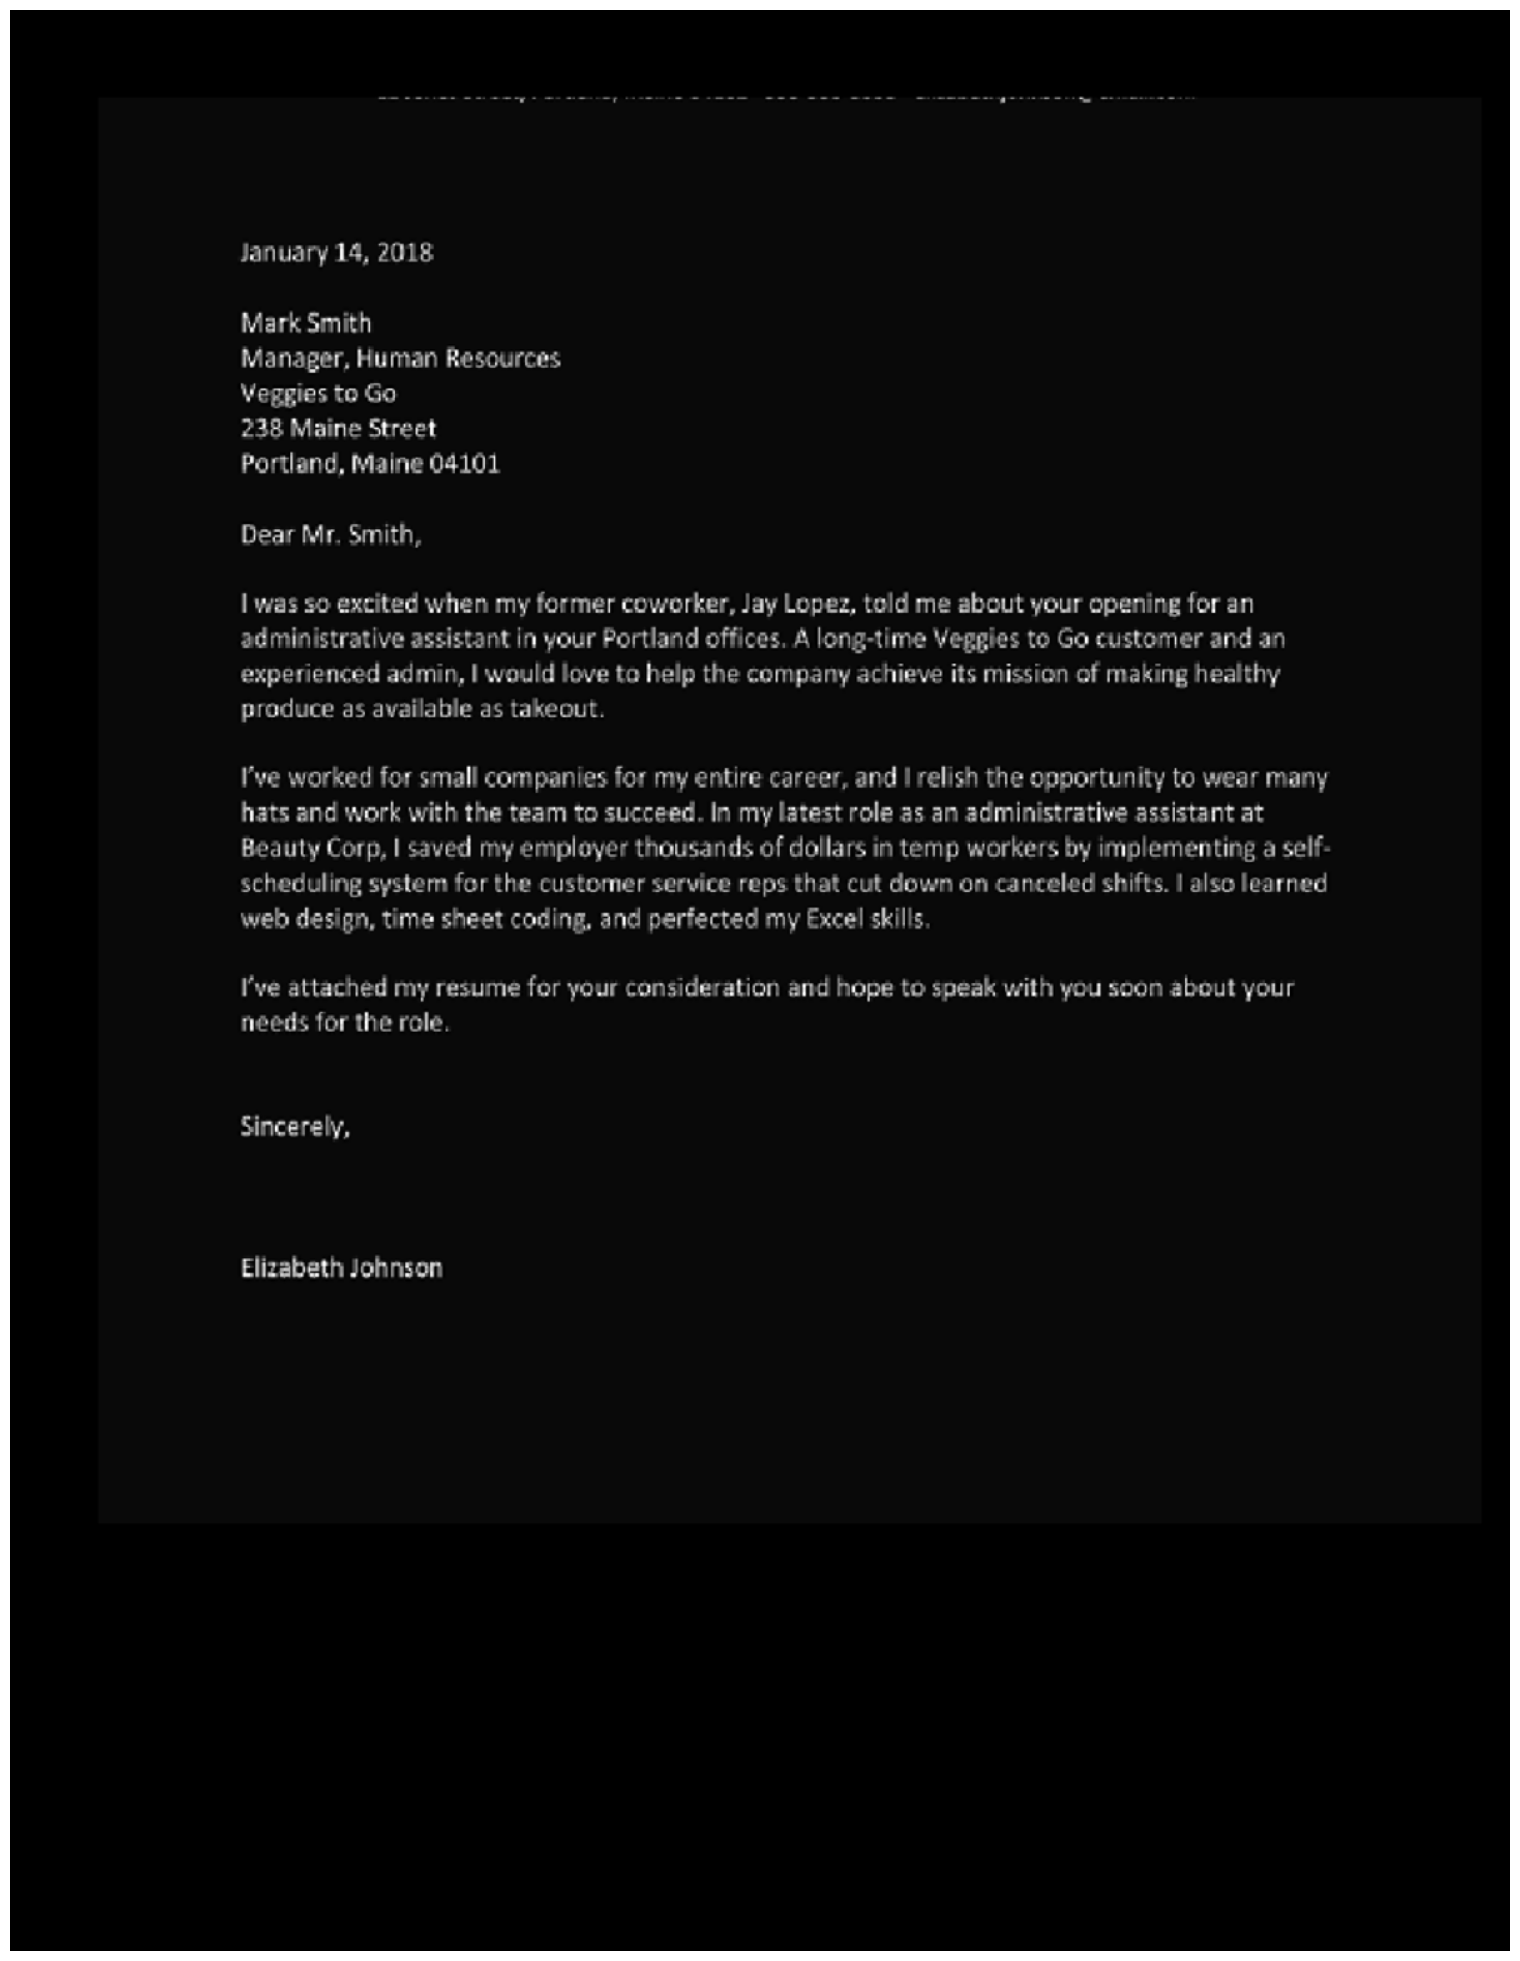

In [19]:
inverted = cv2.bitwise_not(img)
cv2.imwrite('temp/inverted.png', inverted)
display('temp/inverted.png')

## Binarization

In [20]:
def grayscale(img_path):
    return cv2.cvtColor(img_path, cv2.COLOR_BGR2GRAY)


In [22]:
gray_img = grayscale(img)
cv2.imwrite('temp/gray.png', gray_img)

True

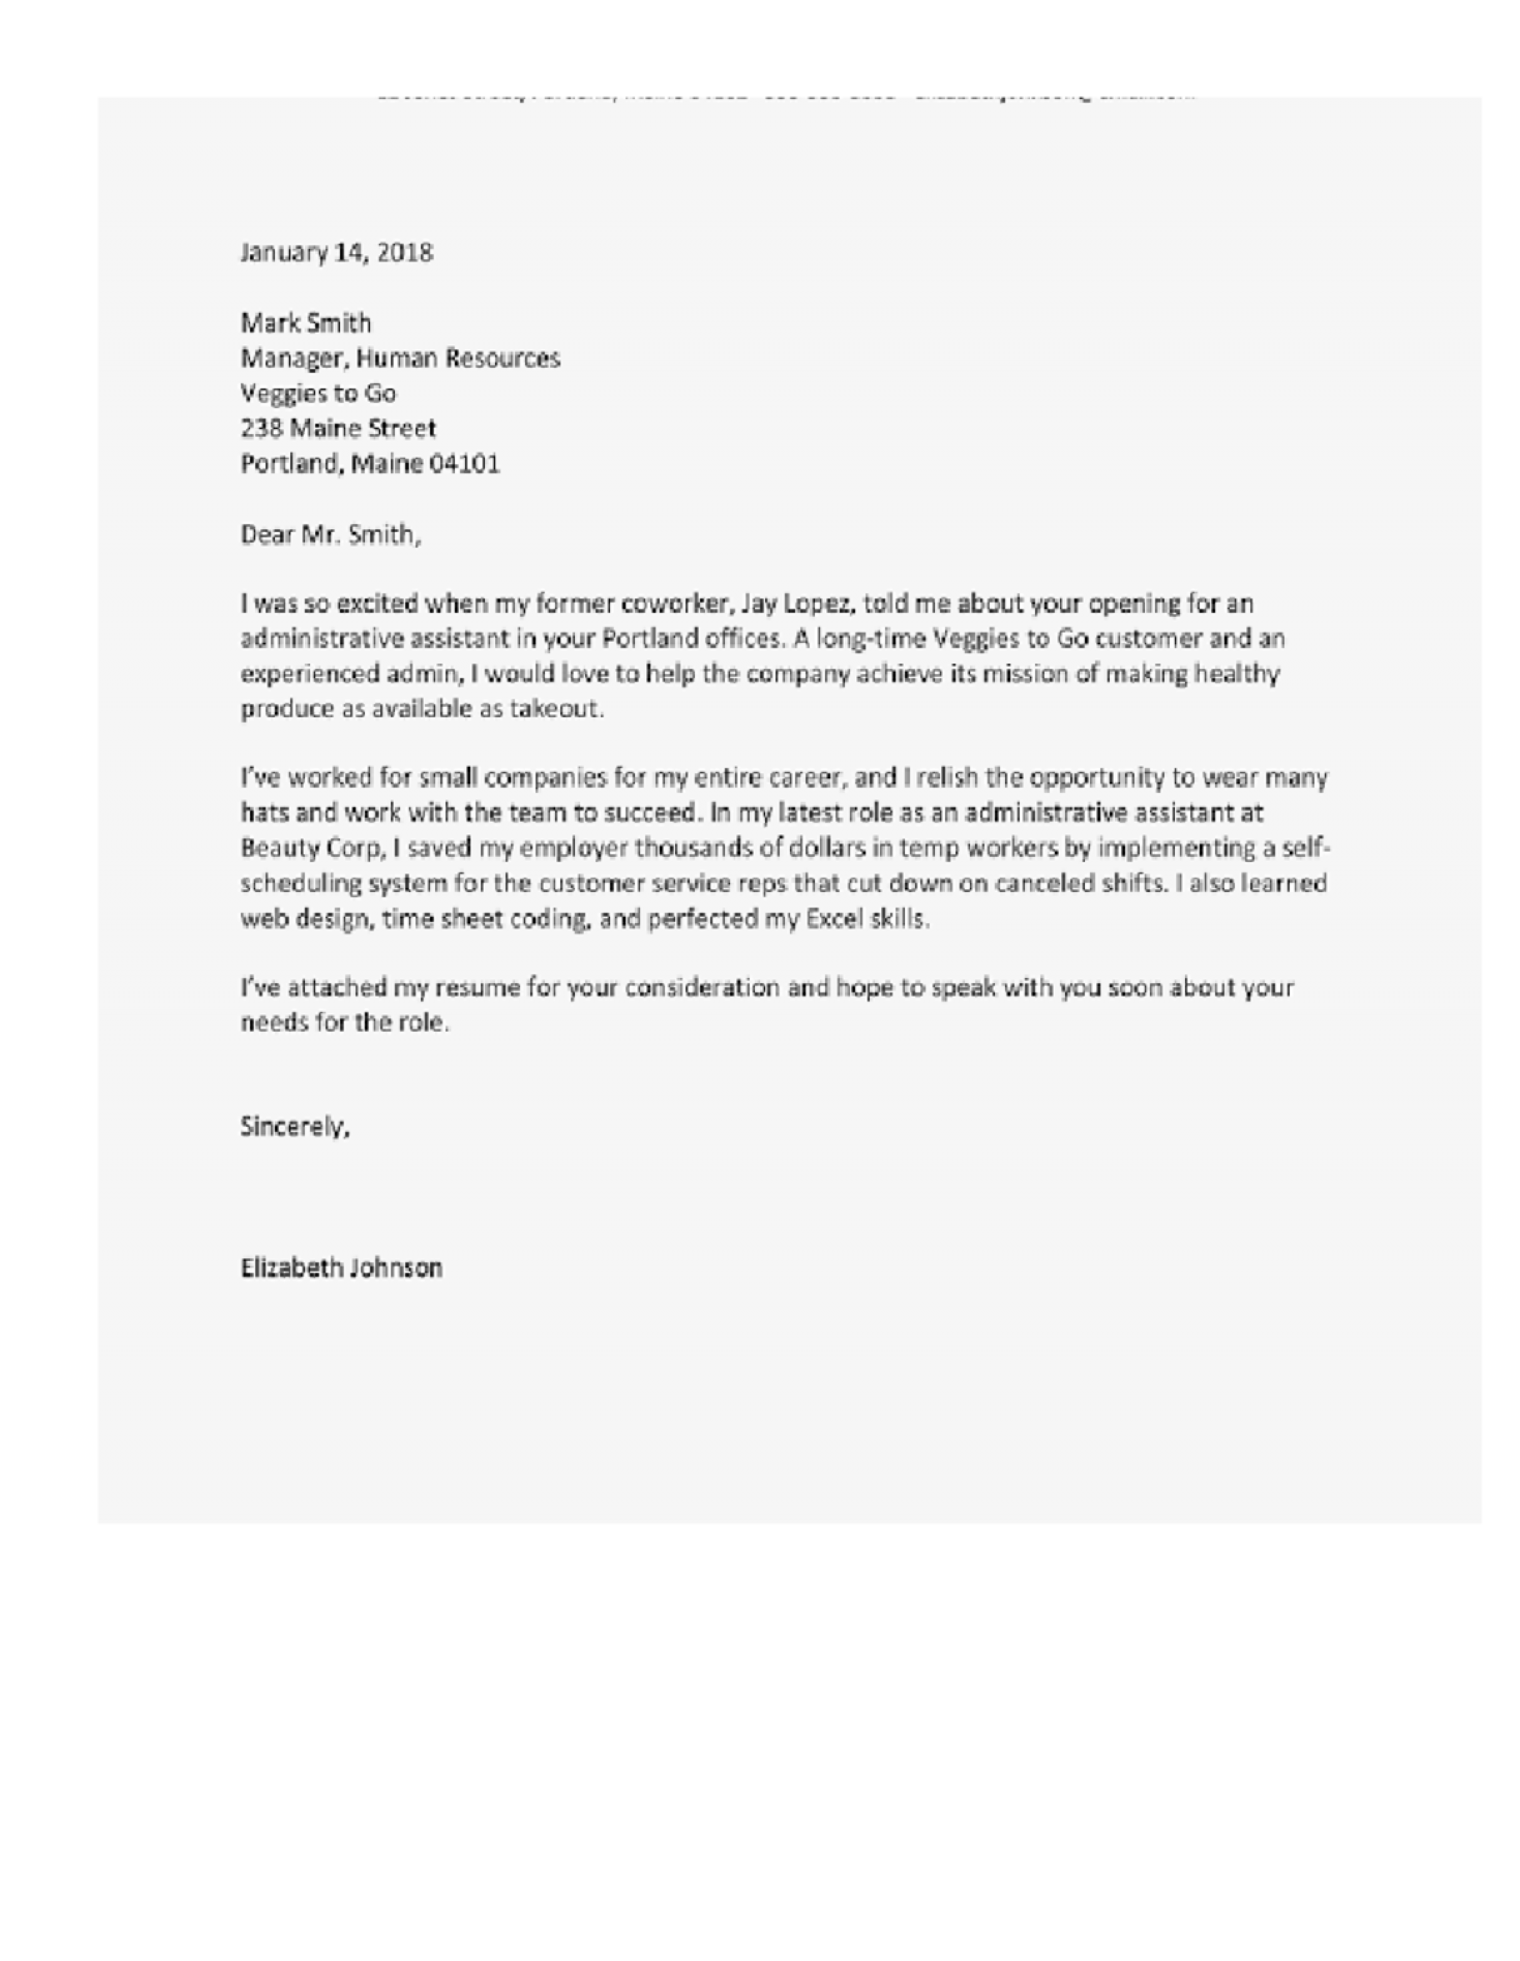

In [23]:
display('temp/gray.png')

In [30]:
thresh, i_bw = cv2.threshold(gray_img, 180, 220, cv2.THRESH_BINARY)
cv2.imwrite('temp/bw.png', i_bw)

True

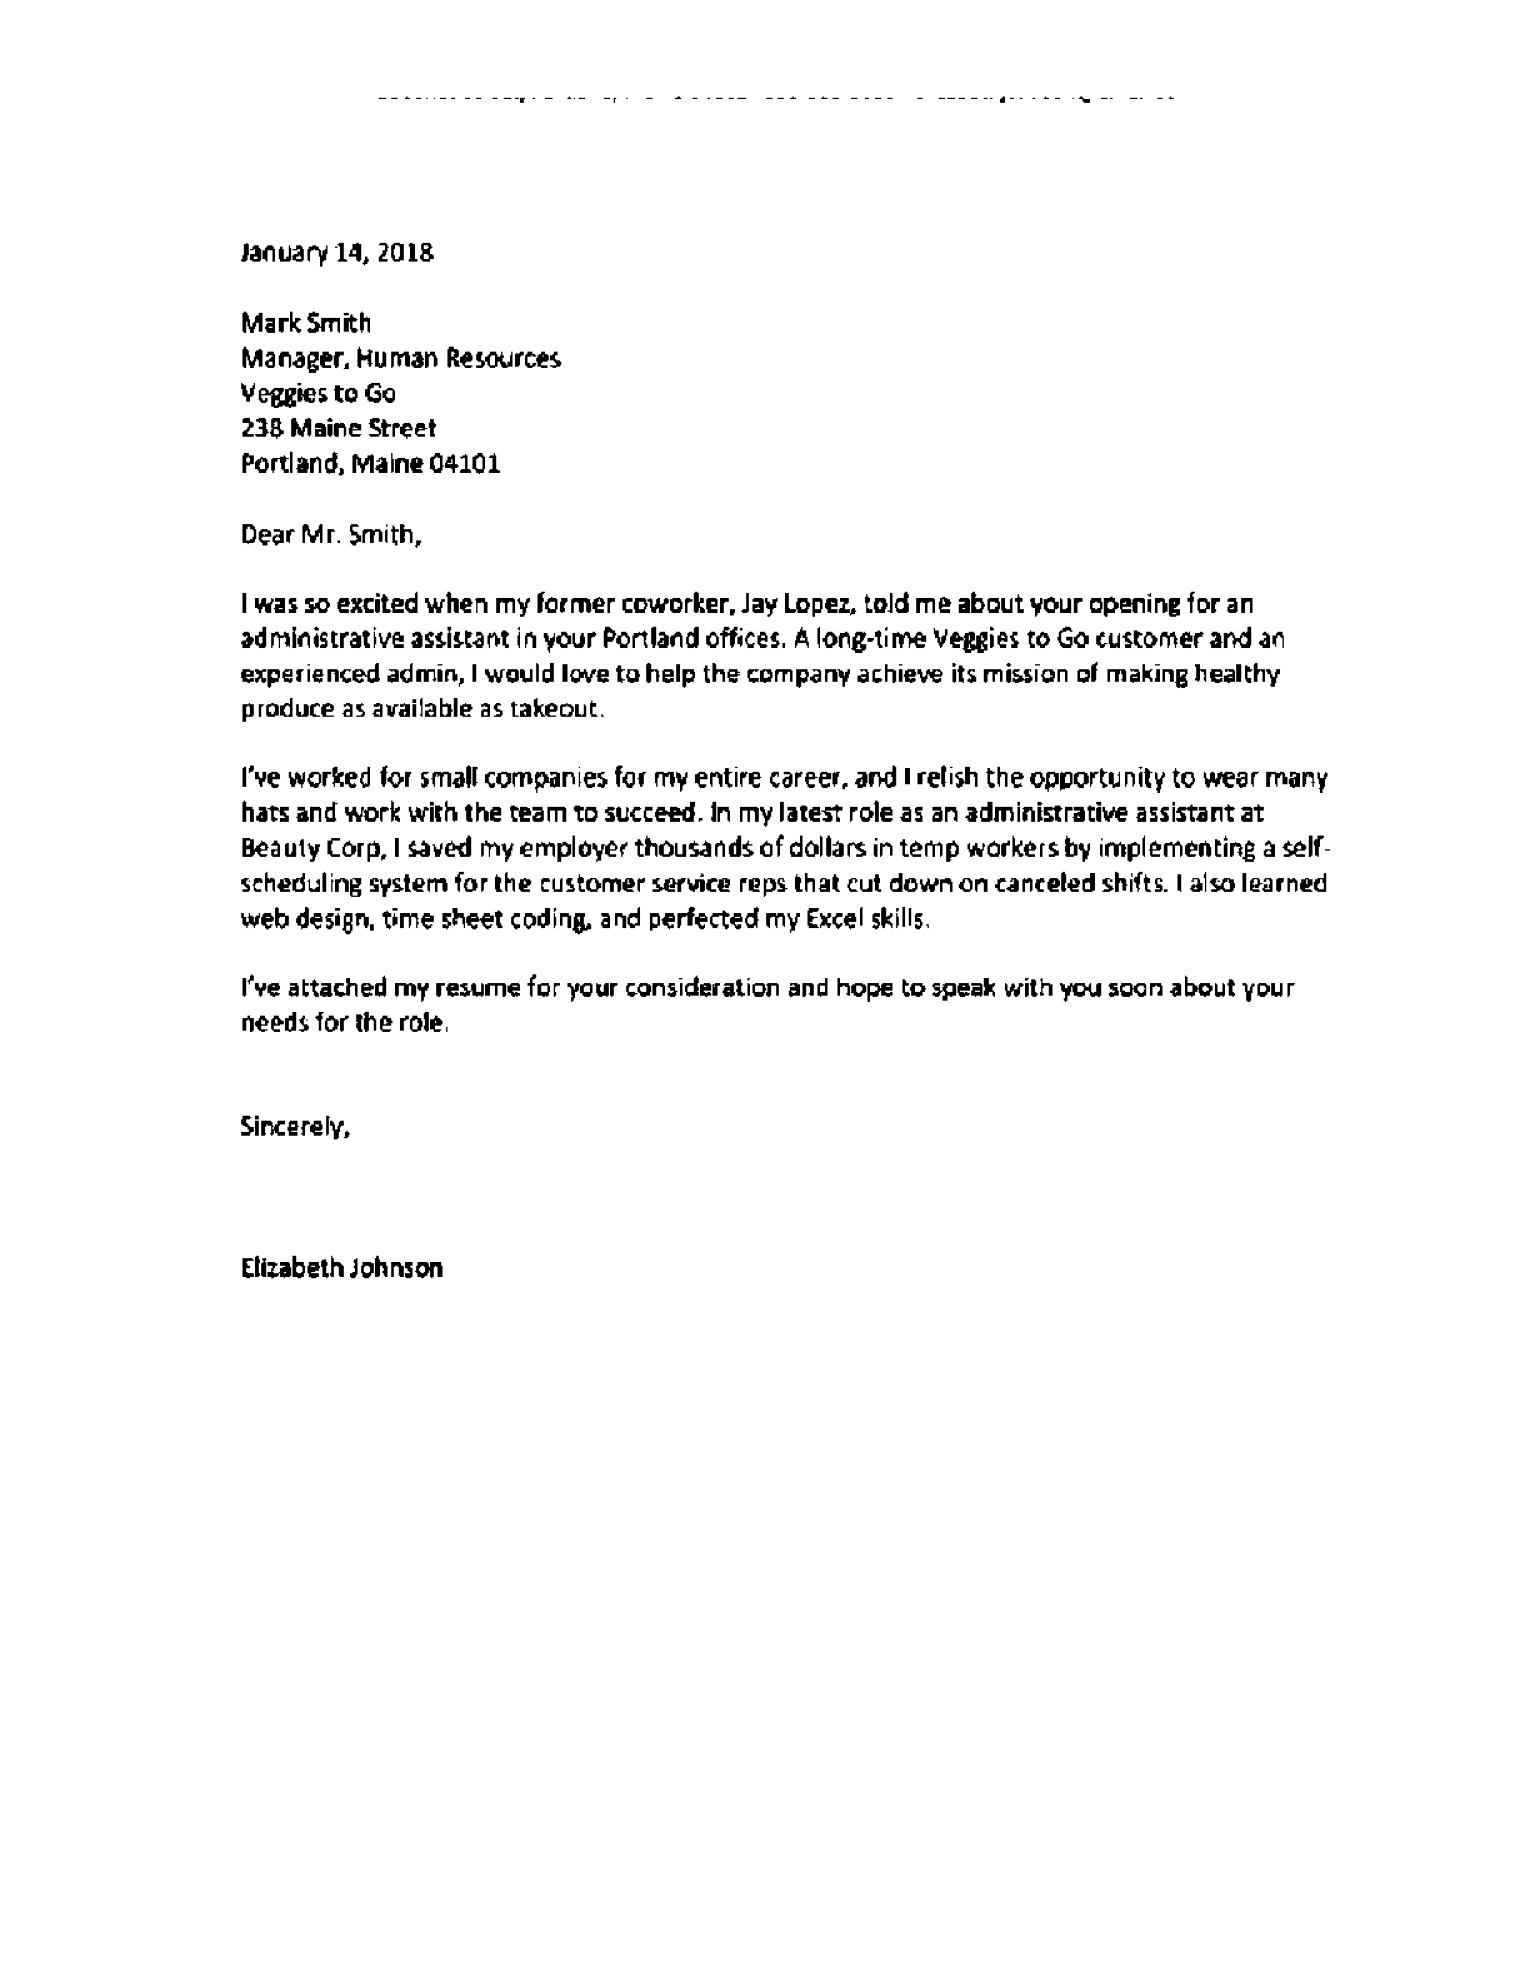

In [31]:
display('temp/bw.png')

## Noise Removal

In [39]:
def noise_removal(img):
    import numpy as np
    kernel = np.ones((1,1), np.uint8)
    image = cv2.dilate(img, kernel, iterations=1)
    kernel_2 = np.ones((3,3), np.uint8)
    image = cv2.erode(img, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image,3)
    return(image)

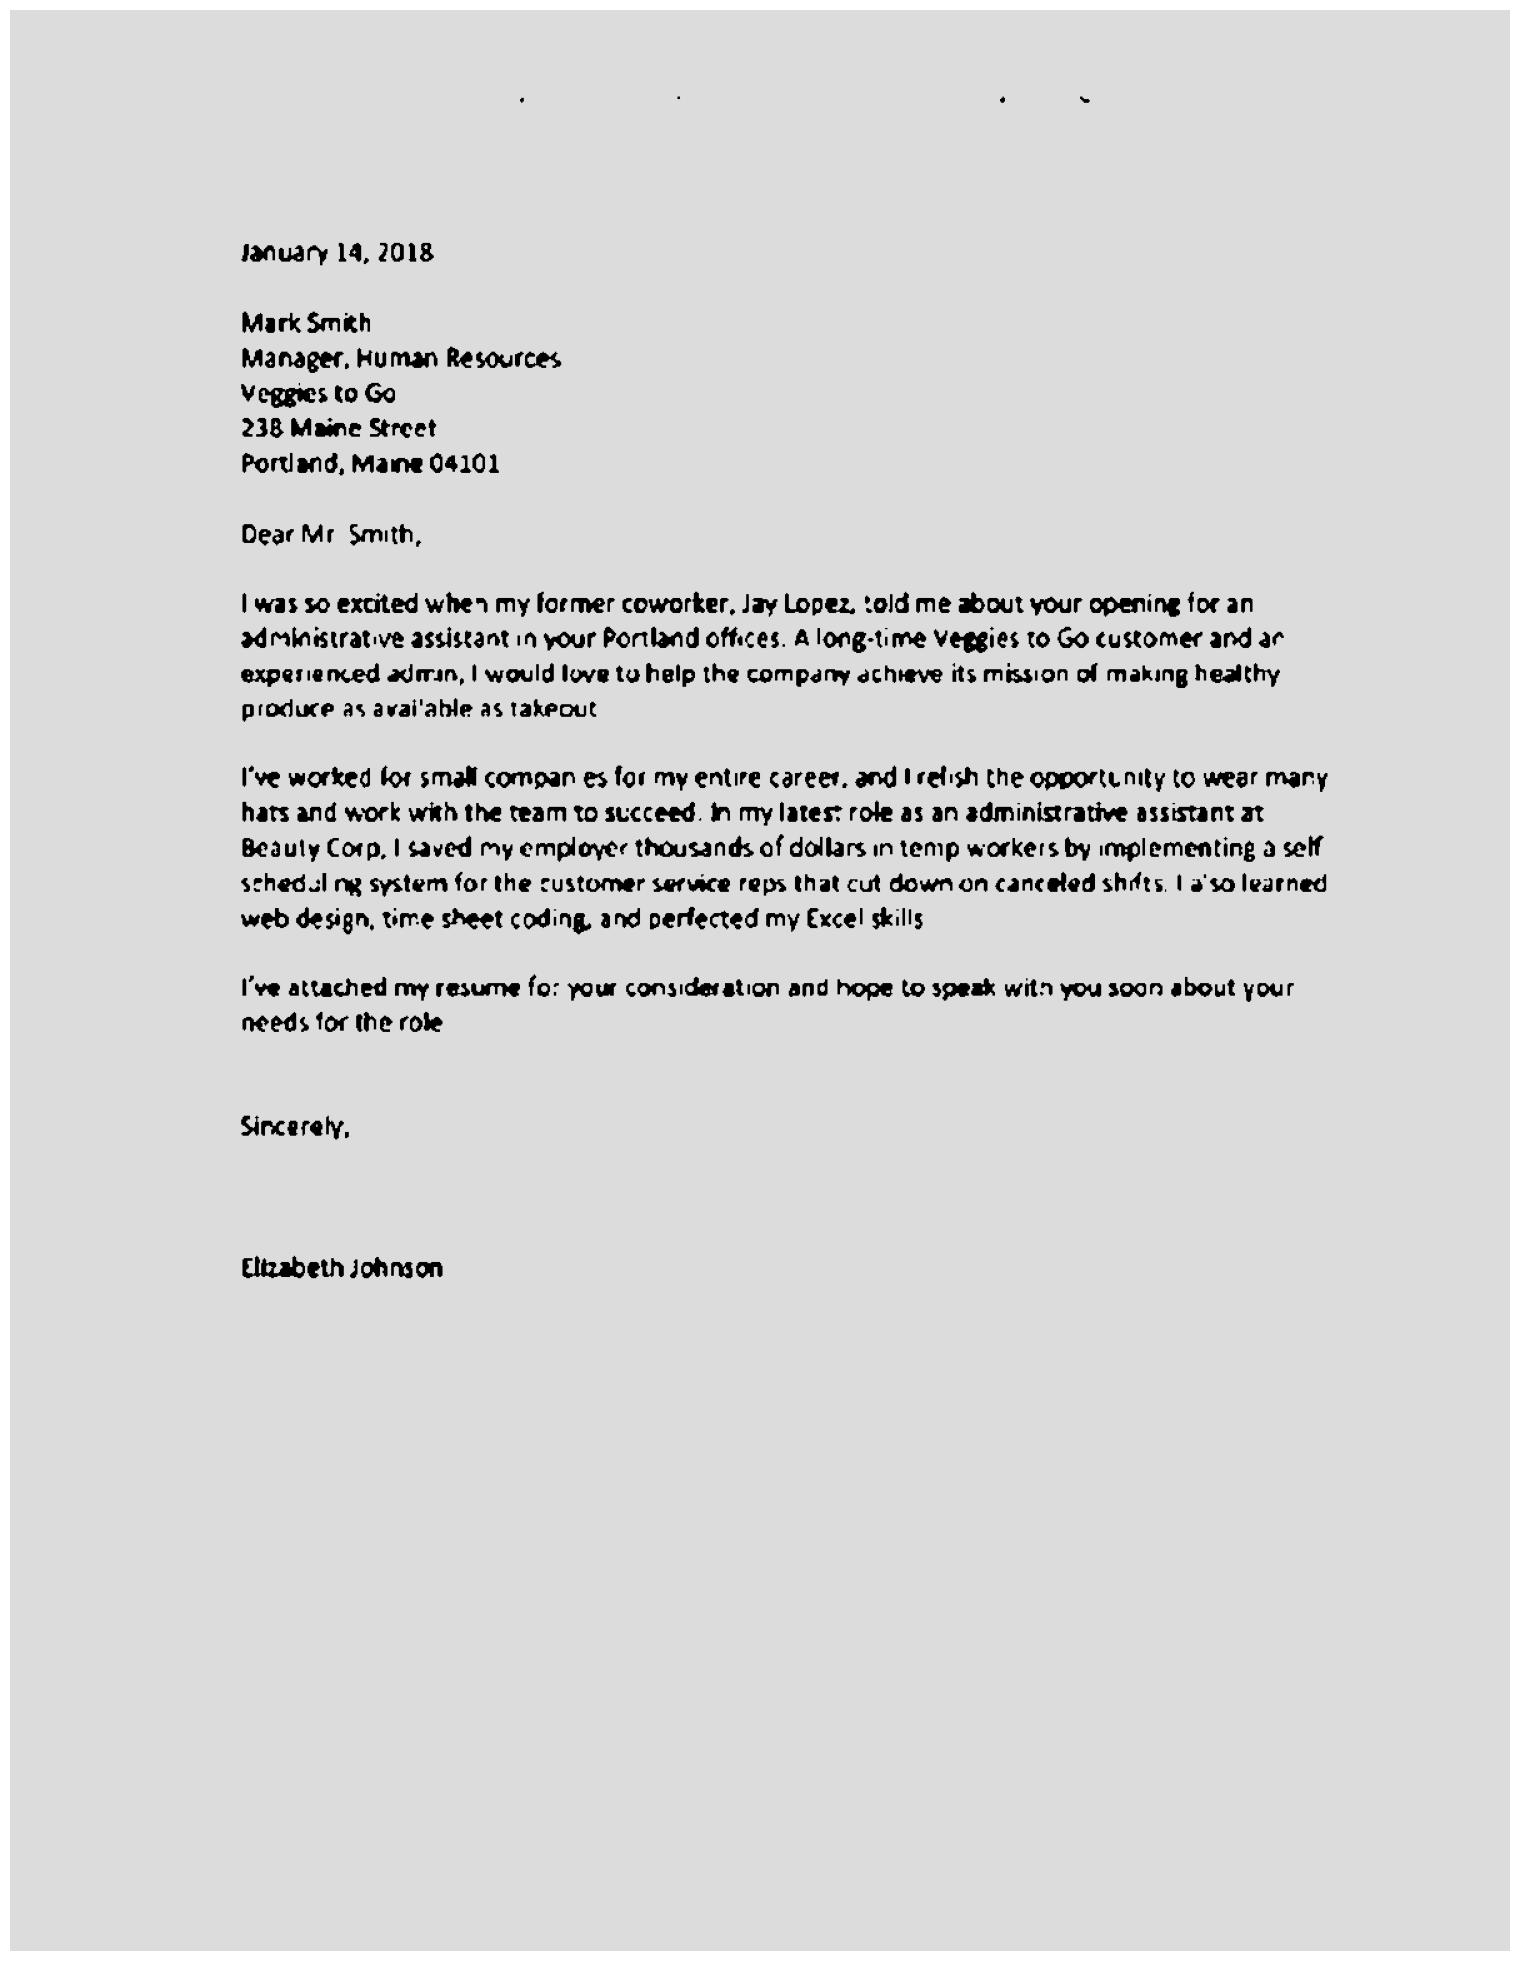

In [41]:
i_bw = cv2.imread('temp/bw.png')
no_noise = noise_removal(i_bw)
cv2.imwrite('temp/noise_remove.png', noise_removal(i_bw))
display('temp/noise_remove.png')

## Dilation / Erosion

In [50]:
def erode_image(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [51]:
erored_img = erode_image(no_noise)
cv2.imwrite('temp/eroded_img.png', erored_img)


True

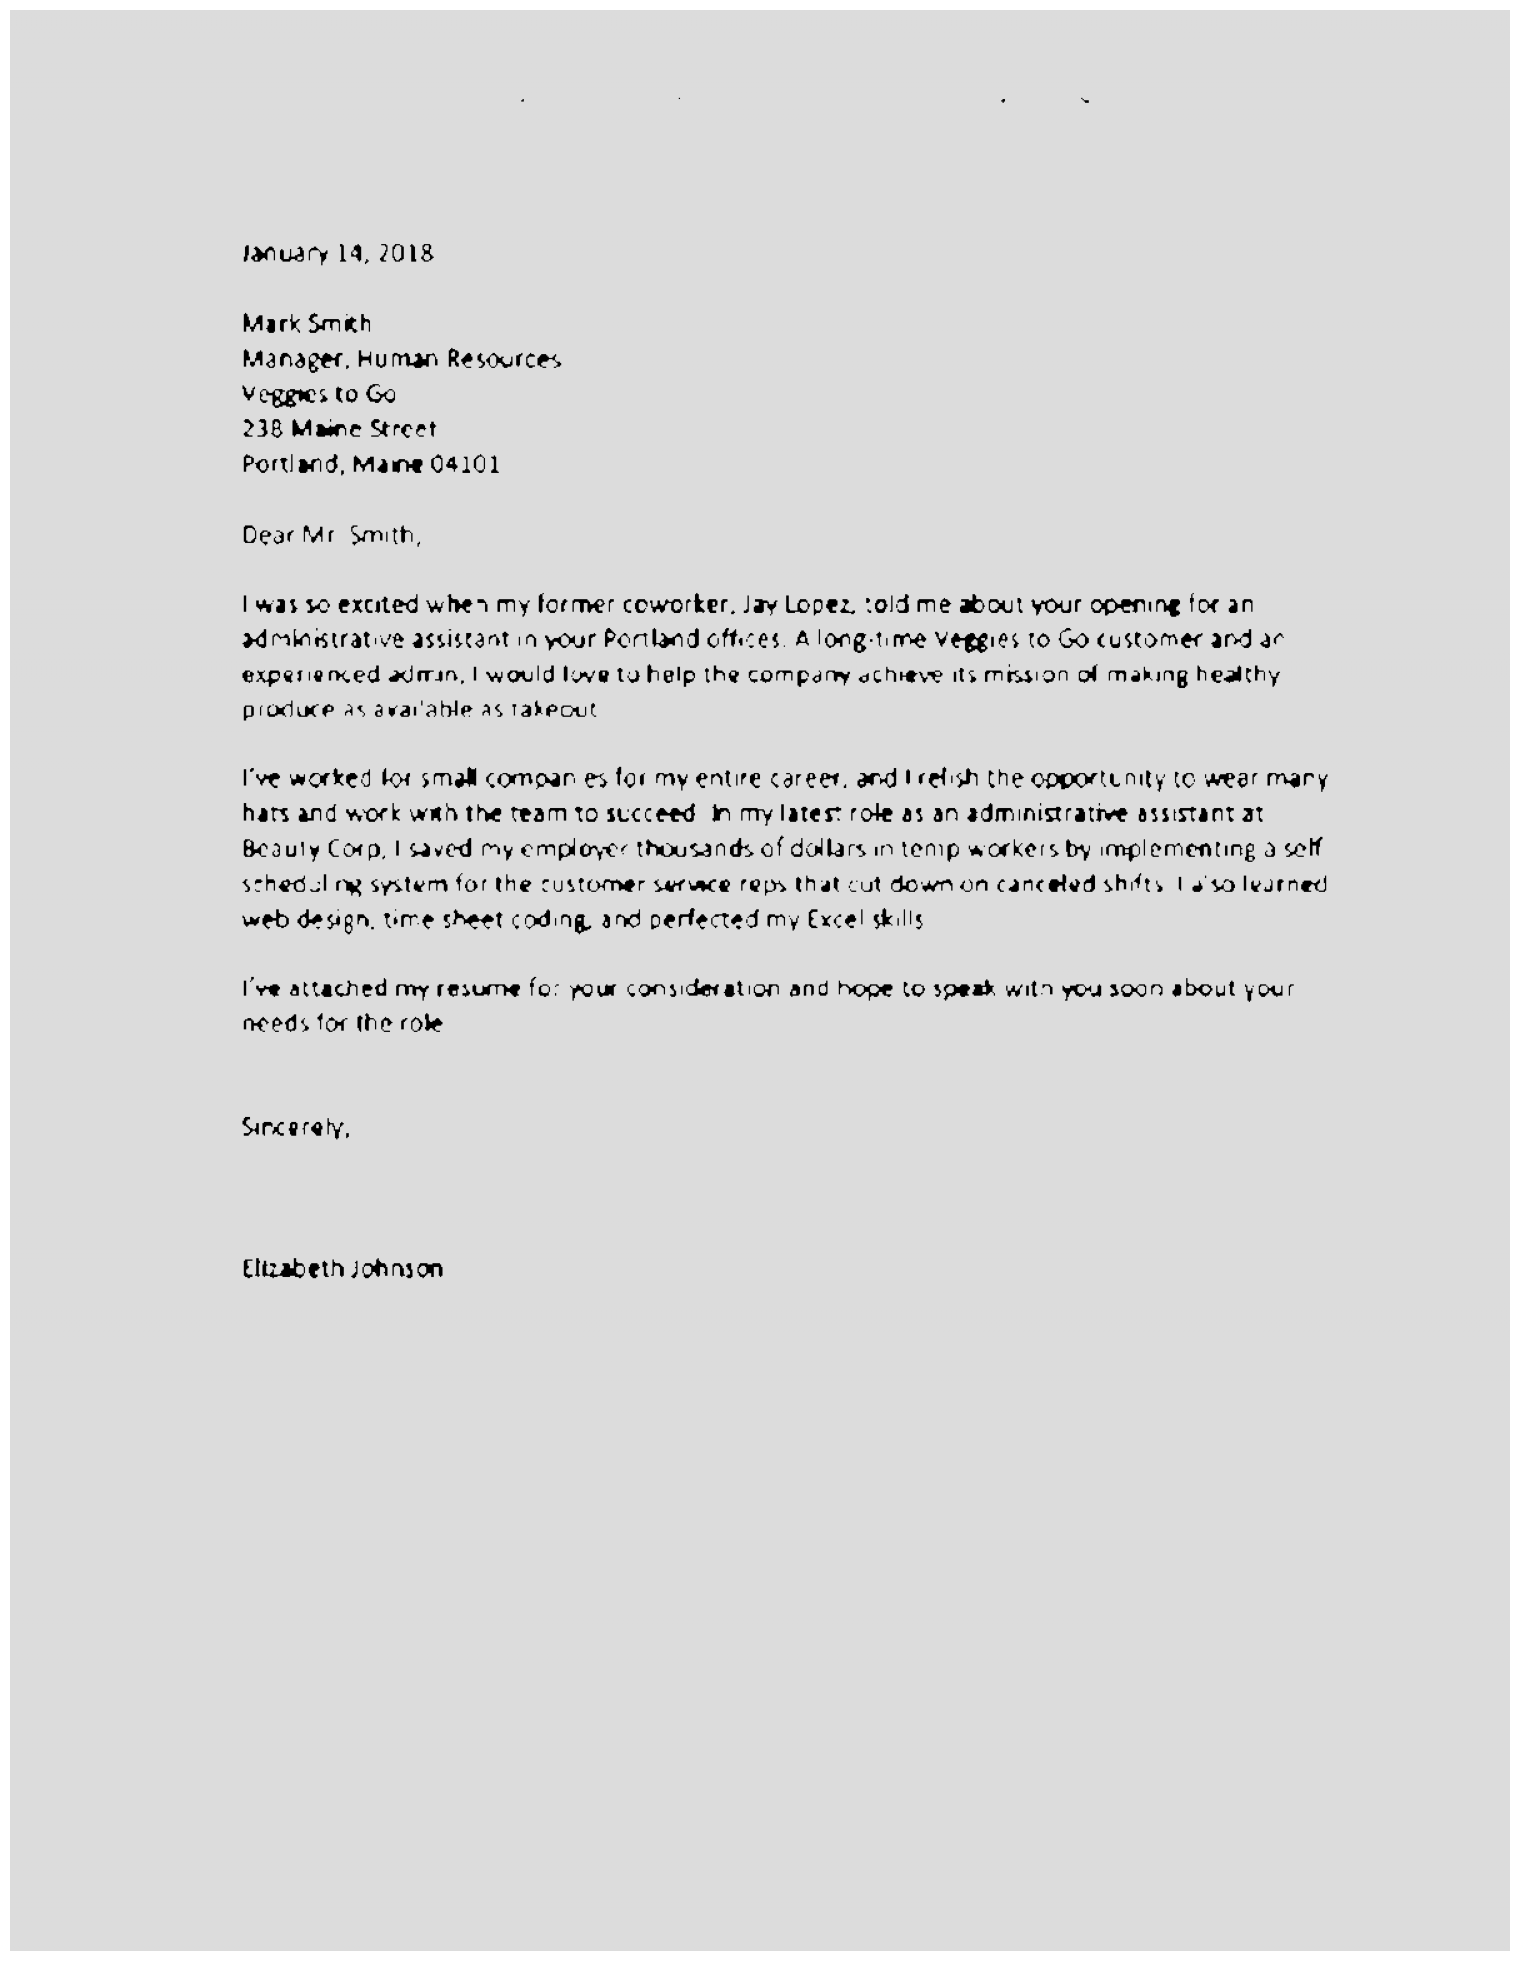

In [52]:
display('temp/eroded_img.png')

In [62]:
def dilate_img(image):
    import numpy as np
    img = cv2.bitwise_not(image)
    kernel = np.array([[0,1,0],[1,0,1],[1,0,1]], np.uint8)
    img = cv2.dilate(img, kernel, iterations=1)
    img = cv2.bitwise_not(img)
    return(img)

In [63]:
dilate_img = dilate_img(no_noise)
cv2.imwrite('temp/dilated_img.png', dilate_img)

True

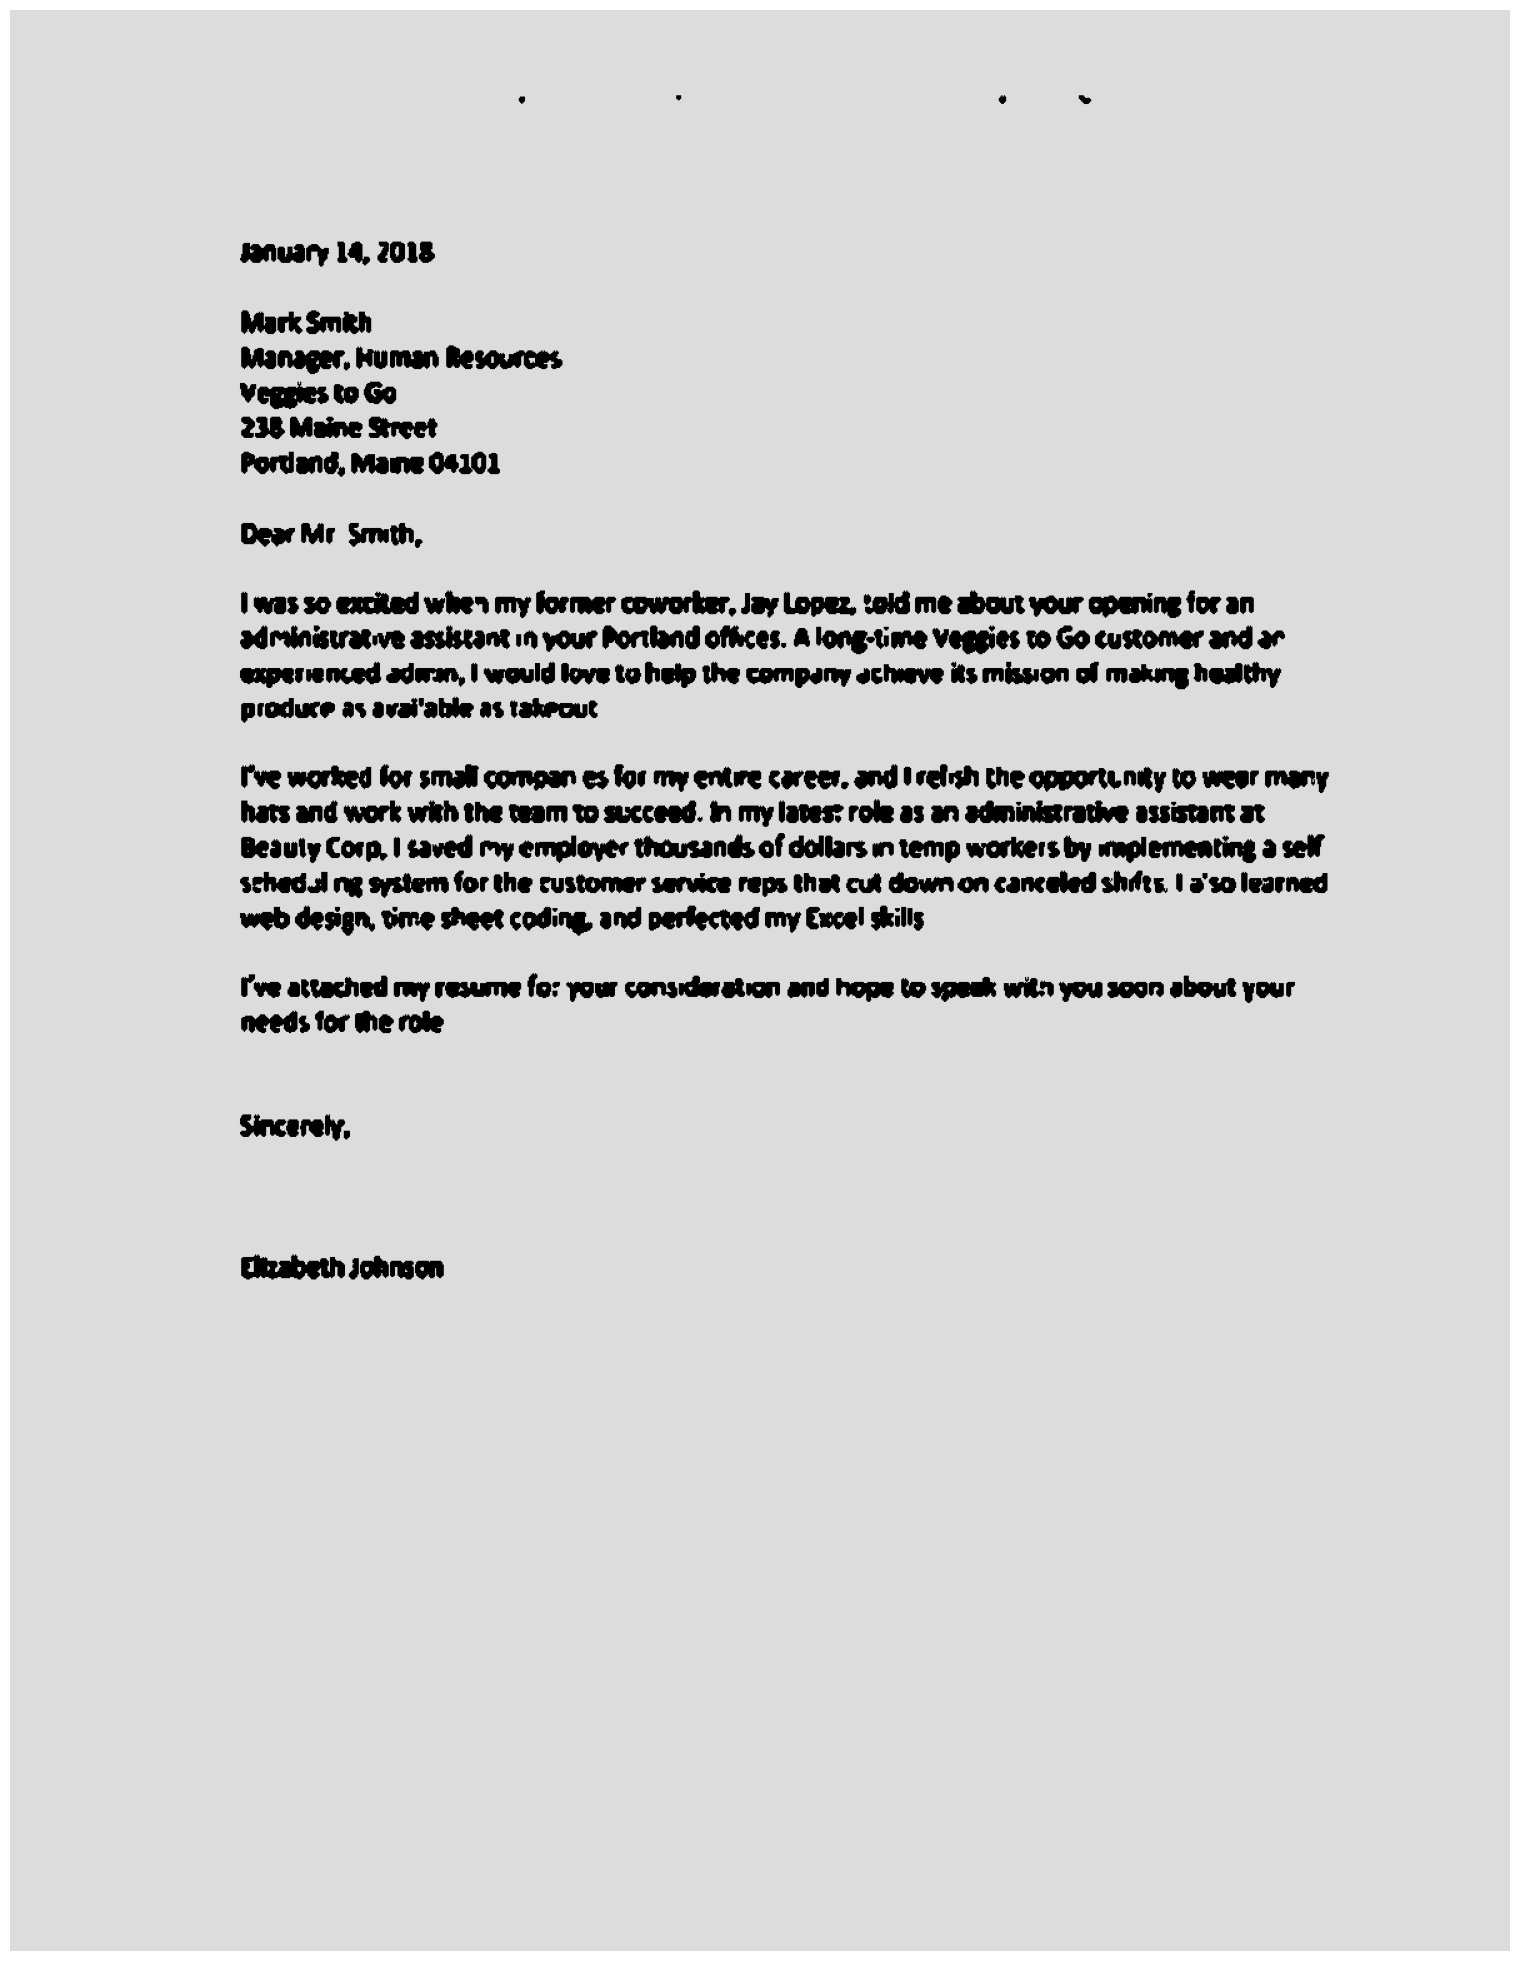

In [64]:
display('temp/dilated_img.png')

## Remove border

In [70]:
import cv2

def remove_border(image):
    # nếu ảnh có 3 kênh (màu), chuyển sang grayscale
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image

    # ngưỡng hóa để tạo ảnh nhị phân (bắt buộc)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # tìm contour
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) == 0:
        print("⚠️ Không tìm thấy contour nào.")
        return image

    # lấy contour lớn nhất
    cntsSorted = sorted(contours, key=lambda x: cv2.contourArea(x))
    cnt = cntsSorted[-1]

    # xác định bounding box quanh contour lớn nhất
    x, y, w, h = cv2.boundingRect(cnt)

    # crop ảnh theo bounding box
    crop = image[y:y+h, x:x+w]

    return crop


In [71]:
crop_img = remove_border(no_noise)
cv2.imwrite('temp/crop.png', crop_img)


True

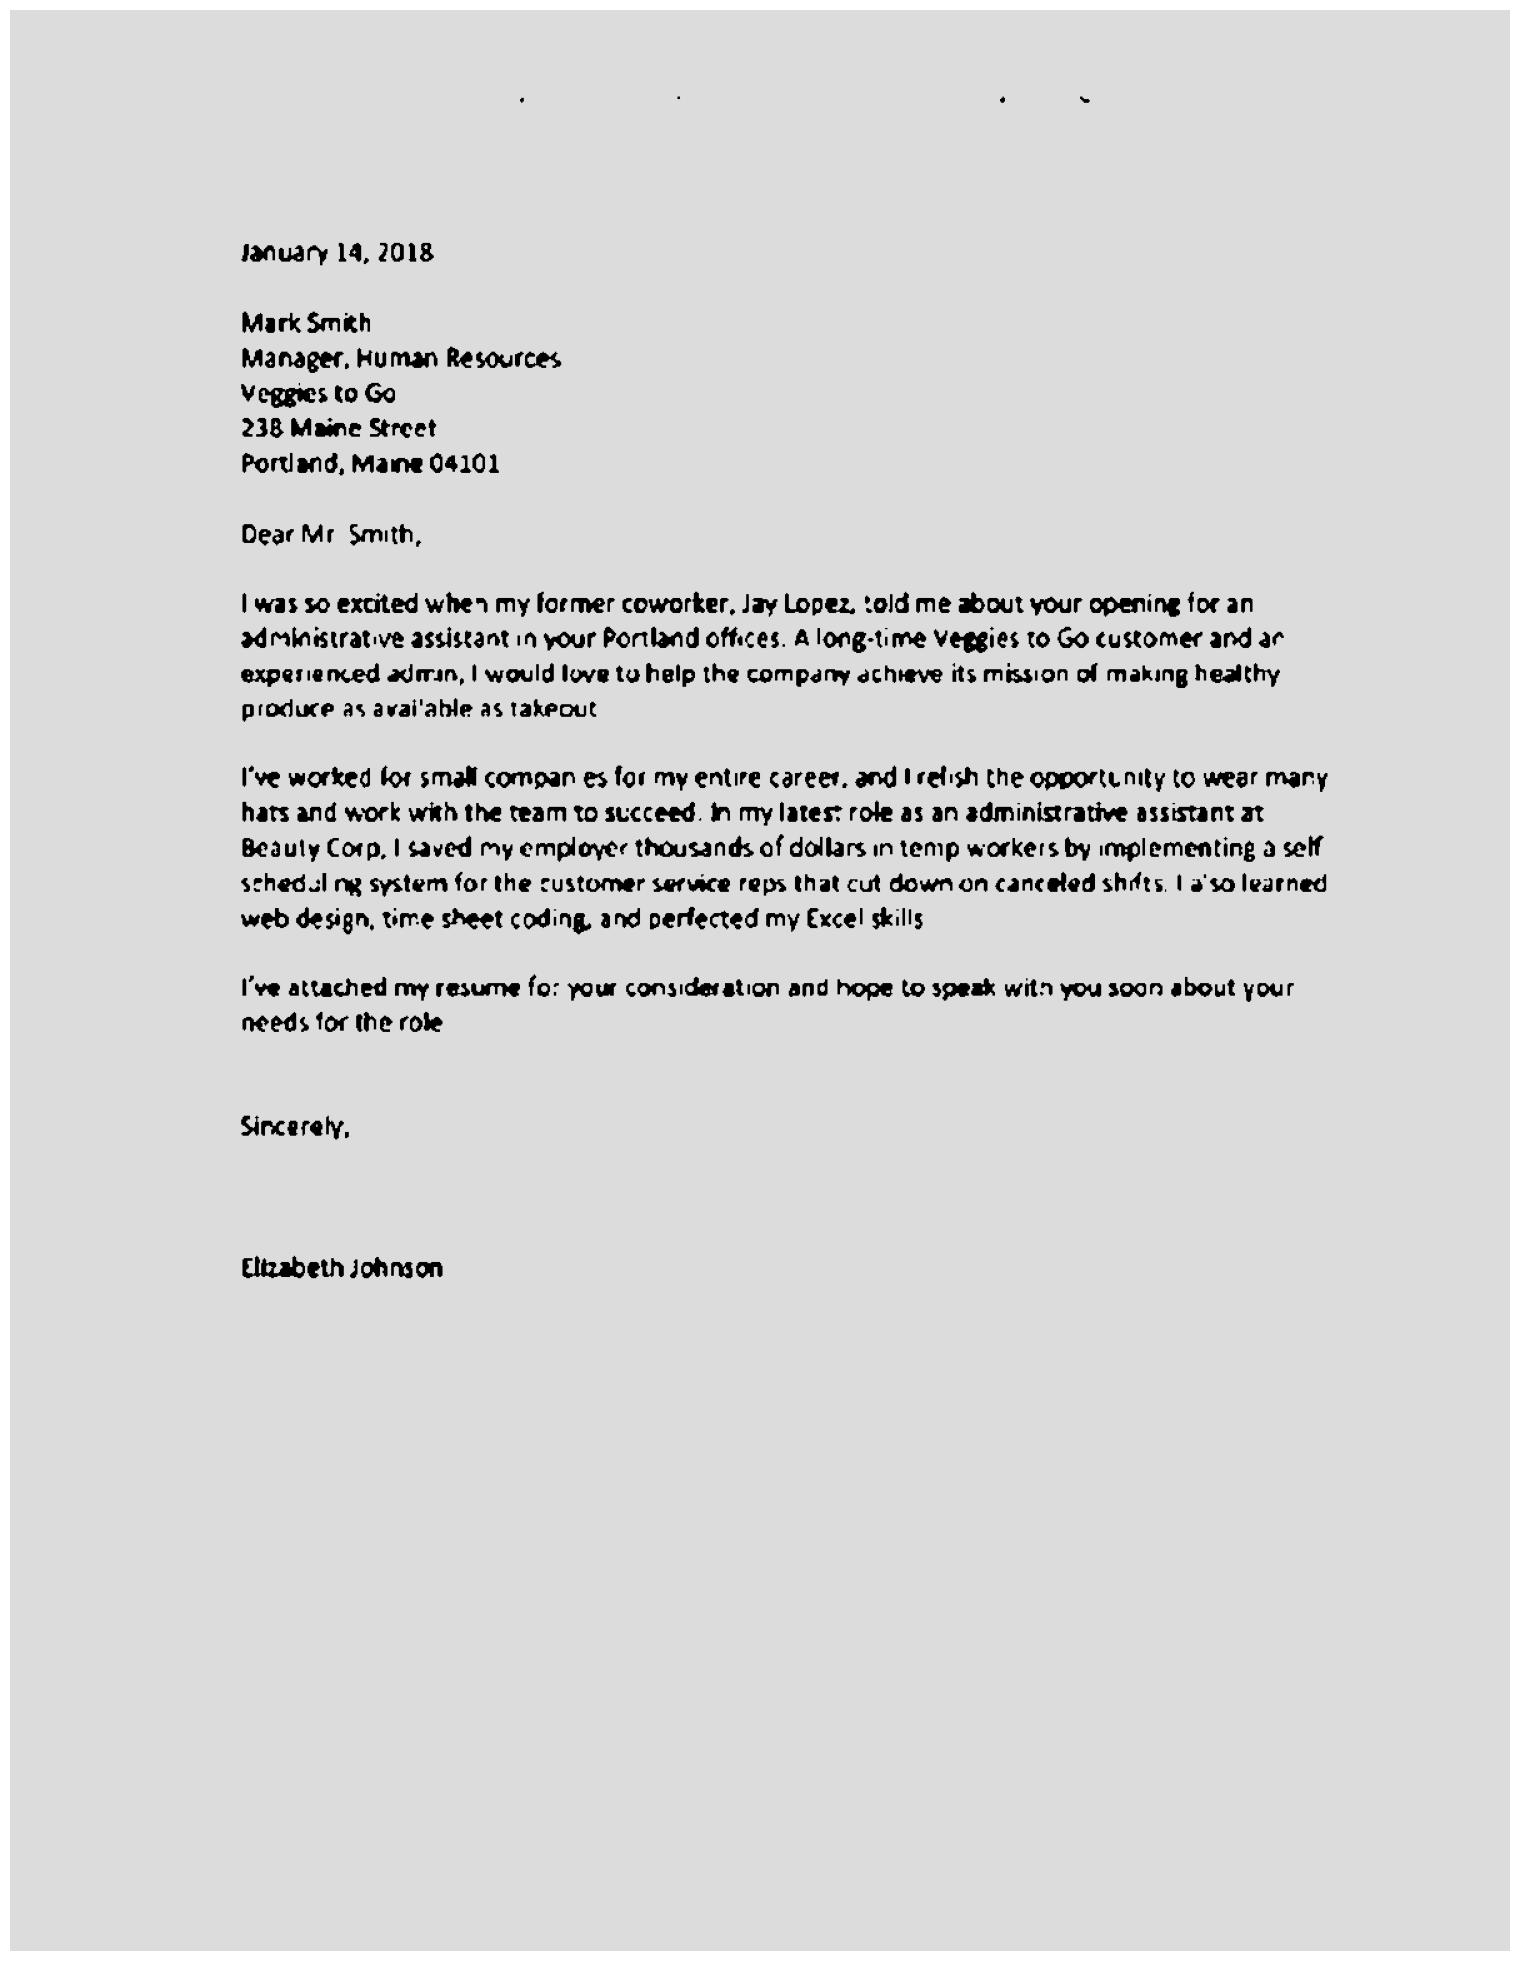

In [72]:
display('temp/crop.png')

## Missing Border

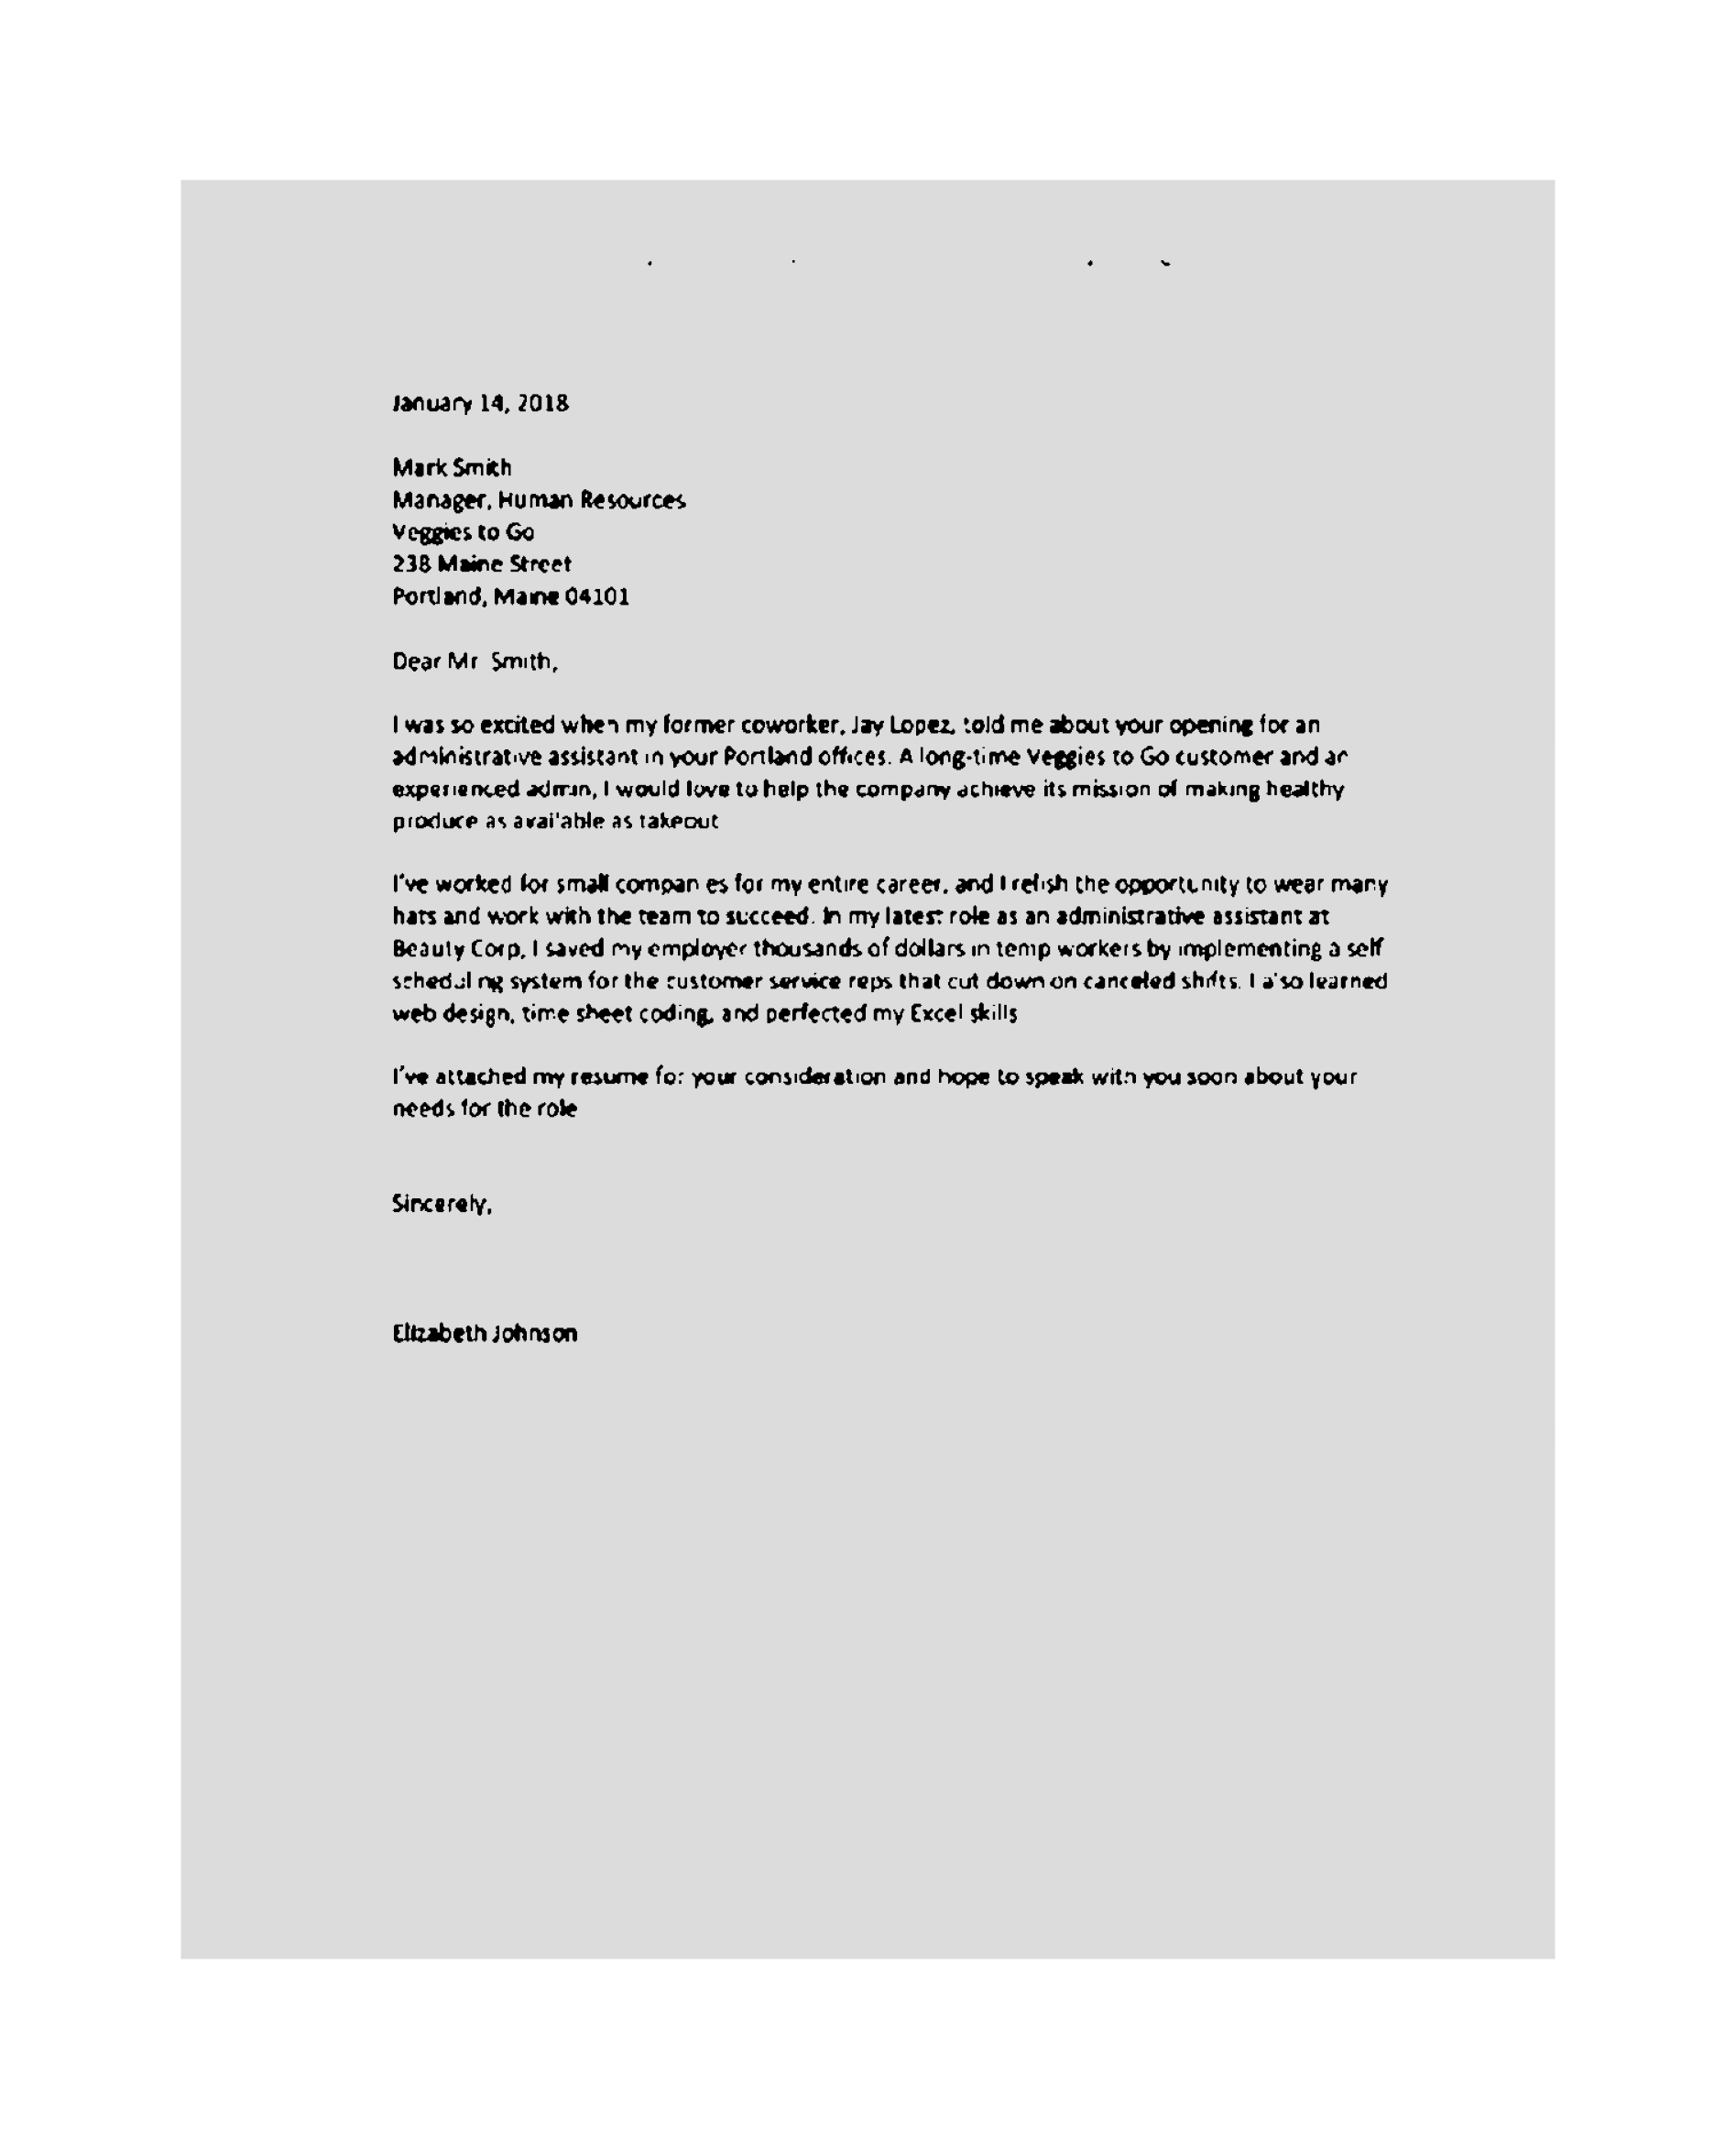

In [73]:
color = [255,255,255]
top, bottom, right, left = [150]*4
image_border = cv2.copyMakeBorder(crop_img, top, bottom, right, left, cv2.BORDER_CONSTANT, value=color)
cv2.imwrite('temp/border_img.png', image_border)
display('temp/border_img.png')

In [74]:
import pytesseract
from PIL import Image

img = 'data/letter.png'
proecess_img = 'temp/noise_remove.png'

img_one = Image.open(img)

ocr_result = pytesseract.image_to_string(img_one)

print(ocr_result)

January 14, 2018

Mark Smith

Manager, Human Resources
Veggies to Go

238 Maine Street

Portland, Maine 04101

Dear Mr. Smith,

I was so excited when my former coworker, Jay Lopez, told me about your opening for an
administrative assistant in your Portland offices. A long-time Veggies to Go customer and an
experienced admin, | would love ta help the company achieve its mission of making healthy
produce as available as takeout.

I've worked for small companies for my entire career, and | relish the opportunity to wear many
hats and work with the team to succeed. In my latest role as an administrative assistant at
Beauty Corp, | saved my employer thousands of dollars in temp workers by implementing a self-
scheduling system for the customer service reps that cut down on canceled shifts. | also learned
web design, time sheet coding, and perfected my Excel skills.

I've attached my resume for your consideration and hope to speak with you soon about your

needs for the rale.

Sincerely,

El